In this notebook we postprocess a little bit the ABIDE data

In [1]:
import pandas as pd
import numpy as np
import os, glob
from os.path import join as opj

In [2]:
data_dir = '../data'

In [3]:
# For reproducibility of this notebook
RANDOM_STATE = 0

# SOCIAL NETWORK LABELS (just for plotting)    
sn_labels = ['cerebellum_lh','anteriorcingulate_lh', 'temporoparietal_lh',
             'amygdala_lh', 'superiortemporal_rh', 'cerebellum_rh',
             'extrastriate_rh', 'fusiform_lh', 'temporalpole_rh',
             'posterirocingulate_lh', 'retrosperial_lh','dorsomedial_lh',
             'retrosperial_rh','temporalpole_lh', 'ventromedial_rh','extrastriate_lh',
             'superiortemporal_lh','amygdala_rh','temporoparietal_rh',
             'anteriorcingulate_rh','ventromedial_lh', 'insula_lh', 'dorsomedial_rh',
             'insula_rh','fusiform_rh', 'posterirocingulate_rh']

In [4]:
vars_to_see=['SITE_ID', 'SUB_ID', 'DX_GROUP', 'SEX','AGE_AT_SCAN', 'DSM_IV_TR', 'FIQ', 'VIQ', 'PIQ',
             'ADI_R_SOCIAL_TOTAL_A','ADI_R_VERBAL_TOTAL_BV']

In [5]:
abide_I = pd.read_csv("../data/ABIDEI_Composite_Phenotypic.csv", encoding = "ISO-8859-1")

abide_I.loc[:, 'ABIDE_ID'] = np.repeat(1, abide_I.shape[0])
abide_II = pd.read_csv("../data/ABIDEII_Composite_Phenotypic.csv", encoding = "ISO-8859-1")
abide_II.loc[:, 'ABIDE_ID'] = np.repeat(2, abide_II.shape[0])

abide_II = abide_II.rename(columns = {'PDD_DSM_IV_TR':'DSM_IV_TR', 
                                     'AGE_AT_SCAN ': 'AGE_AT_SCAN'})

abide_merged = pd.concat([abide_I.loc[:, vars_to_see + ['ABIDE_ID']], abide_II.loc[:, vars_to_see + ['ABIDE_ID']]])

abide_merged = abide_merged.replace(to_replace=-9999.0, value = np.nan)

In [6]:
abide_merged.SITE_ID.unique()

array(['CALTECH', 'CMU', 'KKI', 'LEUVEN_1', 'LEUVEN_2', 'MAX_MUN', 'NYU',
       'OHSU', 'OLIN', 'PITT', 'SBL', 'SDSU', 'STANFORD', 'TRINITY',
       'UCLA_1', 'UCLA_2', 'UM_1', 'UM_2', 'USM', 'YALE', 'ABIDEII-BNI_1',
       'ABIDEII-EMC_1', 'ABIDEII-ETH_1', 'ABIDEII-GU_1', 'ABIDEII-IP_1',
       'ABIDEII-IU_1', 'ABIDEII-KKI_1', 'ABIDEII-KUL_3', 'ABIDEII-NYU_1',
       'ABIDEII-NYU_2', 'ABIDEII-OHSU_1', 'ABIDEII-ONRC_2',
       'ABIDEII-SDSU_1', 'ABIDEII-TCD_1', 'ABIDEII-UCD_1',
       'ABIDEII-UCLA_1', 'ABIDEII-USM_1'], dtype=object)

In [7]:
abide_merged.SITE_ID = abide_merged.SITE_ID.replace(to_replace=abide_merged.SITE_ID.unique(), 
                                                    value=['CALTECH', 'CMU', 'KKI', 'LEUVEN', 'LEUVEN', 'MAX_MUN', 
                                                           'NYU', 'OHSU', 'OLIN', 'PITT', 'SBL', 'SDSU','STANFORD', 
                                                           'TCD', 'UCLA',  'UCLA', 'UM', 'UM', 'USM', 
                                                           'YALE', 'BNI', 'EMC', 'ETH', 
                                                           'GU', 'IP', 'IU',
                                                           'KKI', 'KUL', 'NYU', 
                                                           'NYU', 'OHSU', 'ONRC', 
                                                           'SDSU', 'TCD', 'UCD', 
                                                           'UCLA', 'USM'])

In [8]:
abide_merged.SITE_ID.unique()

array(['CALTECH', 'CMU', 'KKI', 'LEUVEN', 'MAX_MUN', 'NYU', 'OHSU',
       'OLIN', 'PITT', 'SBL', 'SDSU', 'STANFORD', 'TCD', 'UCLA', 'UM',
       'USM', 'YALE', 'BNI', 'EMC', 'ETH', 'GU', 'IP', 'IU', 'KUL',
       'ONRC', 'UCD'], dtype=object)

In [9]:
abide_merged.to_csv("../data/abide_I_II_demo_clean.csv")

In [29]:
ts_I_path = '/home/javier/Documents/amaia/Time Series'

In [4]:
for ts_file in os.listdir(ts_I_path):
    name_splitted = ts_file.split(".txt")
    name_splitted = name_splitted[0].split("_")
    
    if len(name_splitted) is 2:
        sub_id = int(name_splitted[1])
        os.rename(opj(ts_I_path, ts_file), opj(ts_I_path, str(sub_id) + ".txt"))
        
    elif len(name_splitted) is 3:
        sub_id = int(name_splitted[2])
        os.rename(opj(ts_I_path, ts_file), opj(ts_I_path, str(sub_id) + ".txt"))     

In [60]:
ts_I_path = '/media/javier/ExtraDrive2/amaia-abide/ts_I/'

In [61]:
for ts_file in os.listdir(ts_I_path):
    name_splitted = ts_file.split(".txt")
    name_splitted = name_splitted[0].split("_")
    
    if len(name_splitted) is 2:
        sub_id = int(name_splitted[1])
        os.rename(opj(ts_I_path, ts_file), opj(ts_I_path, str(sub_id) + ".txt"))
        
    elif len(name_splitted) is 3:
        sub_id = int(name_splitted[2])
        os.rename(opj(ts_I_path, ts_file), opj(ts_I_path, str(sub_id) + ".txt"))
        
    elif len(name_splitted) is 4:
        sub_id = int(name_splitted[3])
        os.rename(opj(ts_I_path, ts_file), opj(ts_I_path, str(sub_id) + ".txt"))

In [63]:
print(len(np.unique([int(ts_file.split(".txt")[0]) for ts_file in os.listdir(ts_I_path)])))

print(len(os.listdir(ts_I_path)))

1036
1036


In [23]:
ts_II_path = "/media/javier/ExtraDrive2/amaia-abide/ts_II/" 

Remove volumes from Longitudinal data and take only ids

In [21]:
for ts_file in os.listdir(ts_II_path):
    
    if  'Long' in ts_file:
        os.remove(opj(ts_II_path, ts_file))
    else:
        name_splitted = ts_file.split(".txt")
        name_splitted = name_splitted[0].split("_")

        if len(name_splitted) is 3:
            sub_id = int(name_splitted[2])
            os.rename(opj(ts_II_path, ts_file), opj(ts_II_path, str(sub_id) + ".txt"))
            #print(sub_id)

        elif len(name_splitted) is 4:
            sub_id = int(name_splitted[3])
            #print(sub_id)
            os.rename(opj(ts_II_path, ts_file), opj(ts_II_path, str(sub_id) + ".txt"))

In [22]:
# check that all IDs are unique
print(len(np.unique([int(ts_file.split(".txt")[0]) for ts_file in os.listdir(ts_I_path)])))
print(len(np.unique([int(ts_file.split(".txt")[0]) for ts_file in os.listdir(ts_II_path)])))

print(len(np.unique([int(ts_file.split(".txt")[0]) for ts_file in os.listdir(ts_I_path)] + \
                    [int(ts_file.split(".txt")[0]) for ts_file in os.listdir(ts_II_path)] )))

1036
968
2004


In [18]:
# Do the same with structural info to have only the Subject ID
s_data = pd.read_csv("/media/javi/ExtraDrive2/amaia-abide/structural.csv")

In [22]:
s_data.sub_id.to_csv("../data/subjects_used.txt", index=False, header=None)

In [27]:
sub_id = []
for name in s_data.iloc[:,1]:
    name_splitted = name.split("_")
    if len(name_splitted) is 2:
        sub_id.append(int(name_splitted[1]))
    elif len(name_splitted) is 3:
        sub_id.append(int(name_splitted[2]))
    elif len(name_splitted) is 4:
        sub_id.append(int(name_splitted[3]))

AttributeError: 'int' object has no attribute 'split'

In [18]:
print(len(sub_id))
print(len(np.unique(sub_id)))

1917
1917


In [19]:
s_data.iloc[:, 0] = sub_id

In [14]:
s_data= s_data.rename(columns = {s_data.columns[0]: 'sub_id'})

In [30]:
s_data.to_csv("/home/javier/Documents/amaia/data/structural.csv")

In [47]:
pd.read_csv("/home/javier/Documents/amaia/data/structural/abide_1/aparc_thickness_lh.txt", sep="\t", skiprows=1,
            header=None).shape

(1053, 36)

In [48]:
len(pd.read_csv("/home/javier/Documents/amaia/data/structural/abide_1/aparc_thickness_lh.txt", sep="\t").columns)


36

In [46]:
pd.read_csv("/home/javier/Documents/amaia/data/structural/abide_1/aparc_thickness_lh.txt", sep="\t", skiprows=1,
            header=None)
pd.read_csv("/home/javier/Documents/amaia/data/structural/abide_1/aparc_thickness_lh.txt", sep="\t").columns


Index(['lh.aparc.thickness', 'lh_bankssts_thickness',
       'lh_caudalanteriorcingulate_thickness',
       'lh_caudalmiddlefrontal_thickness', 'lh_cuneus_thickness',
       'lh_entorhinal_thickness', 'lh_fusiform_thickness',
       'lh_inferiorparietal_thickness', 'lh_inferiortemporal_thickness',
       'lh_isthmuscingulate_thickness', 'lh_lateraloccipital_thickness',
       'lh_lateralorbitofrontal_thickness', 'lh_lingual_thickness',
       'lh_medialorbitofrontal_thickness', 'lh_middletemporal_thickness',
       'lh_parahippocampal_thickness', 'lh_paracentral_thickness',
       'lh_parsopercularis_thickness', 'lh_parsorbitalis_thickness',
       'lh_parstriangularis_thickness', 'lh_pericalcarine_thickness',
       'lh_postcentral_thickness', 'lh_posteriorcingulate_thickness',
       'lh_precentral_thickness', 'lh_precuneus_thickness',
       'lh_rostralanteriorcingulate_thickness',
       'lh_rostralmiddlefrontal_thickness', 'lh_superiorfrontal_thickness',
       'lh_superiorparieta

Here for our convenience, we transform the Freesurfer parcellation to have identified what is called "social network" regions.

In [20]:
import json

with open(opj(data_dir, "sn_map_fs.json")) as json_file:
    sn_fs = json.load(json_file)
    
with open(opj(data_dir, "sn_out_fs.json")) as json_file:
    sn_out_fs = json.load(json_file)

In [37]:
if os.path.exists(opj(data_dir, "times_series_SN")) is False:
    os.mkdir(opj(data_dir, "times_series_SN"))

In [49]:
np.loadtxt(opj(ts_I_path, os.listdir(ts_I_path)[0]))[ [1,2], :].mean(axis=0).shape

(120,)

In [65]:
rois = pd.read_csv('/media/javier/data/amaia-abide/rois.txt', header=None).iloc[:,0].values
for key, value in sn_fs.items():
    print(key,"=", rois[value])
print(" ")    
for key, value in sn_out_fs.items():
    print(key,"=", rois[value])

cerebellum_lh = ['Left-Cerebellum-Cortex']
anteriorcingulate_lh = ['ctx-lh-rostralanteriorcingulate']
temporoparietal_lh = ['ctx-lh-inferiorparietal' 'ctx-lh-superiortemporal']
amygdala_lh = ['Left-Amygdala']
superiortemporal_rh = ['ctx-rh-superiortemporal']
cerebellum_rh = ['Right-Cerebellum-Cortex']
extrastriate_rh = ['ctx-rh-lateraloccipital']
fusiform_lh = ['ctx-lh-fusiform']
temporalpole_rh = ['ctx-rh-temporalpole']
posterirocingulate_lh = ['ctx-lh-posteriorcingulate']
retrosperial_lh = ['ctx-lh-isthmuscingulate']
dorsomedial_lh = ['ctx-lh-superiorfrontal']
retrosperial_rh = ['ctx-rh-isthmuscingulate']
temporalpole_lh = ['ctx-lh-temporalpole']
ventromedial_rh = ['ctx-rh-superiorfrontal' 'ctx-rh-medialorbitofrontal']
extrastriate_lh = ['ctx-lh-lateraloccipital']
superiortemporal_lh = ['ctx-lh-superiortemporal']
amygdala_rh = ['Right-Amygdala']
temporoparietal_rh = ['ctx-rh-inferiorparietal' 'ctx-rh-superiortemporal']
anteriorcingulate_rh = ['ctx-rh-rostralanteriorcingulate']
ventro

In [50]:
ts_SN_dir = opj(data_dir, "times_series_SN")

In [26]:
ts_I_path = '/media/javier/data/amaia-abide/ts_I/'
ts_II_path = '/media/javier/data/amaia-abide/ts_II/'

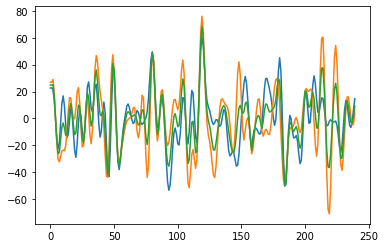

In [52]:
from matplotlib.pylab import plt
plt.plot(ts[sn_fs['temporoparietal_lh'],:][0,:])
plt.plot(ts[sn_fs['temporoparietal_lh'],:][1,:])
plt.plot(ts[sn_fs['temporoparietal_lh'],:].mean(axis=0))

In [76]:
ts.mean()

-0.3591929141310654

In [79]:
for ts_file in os.listdir(ts_I_path)[:10]:
    ts = np.loadtxt(opj(ts_I_path, ts_file))
    ts_df = pd.DataFrame({})
    for key in sn_fs.keys():
        ts_df[key] = ts[sn_fs[key],:].mean(axis=0)
        
    for key in sn_out_fs.keys():
        ts_df[key] = ts[sn_out_fs[key],:]
    print(ts.mean(), " ", ts_df.values.mean())
    #ts_df = ts_df.T
        
    #ts_df.to_csv(opj(ts_SN_dir, ts_file), index=False, header=False)

1.5095779549249724e-07   1.6387014049106545e-07
-3.991350486331088e-08   -3.8401083342988976e-08
-0.05583161306704583   -0.05604941658499313
0.0011737005369820076   0.0013860773322650589
1.549268696911749e-07   1.4472461434813787e-07
-0.9055152104554206   -0.9056774116361931
-5.073878368907466e-08   -4.694465932844164e-08
-1.2462025735910295e-07   -1.2056720306808768e-07
-0.0022231326976061   -0.002119673477937481
-0.3591929141310654   -0.3562186725071393


In [71]:
for ts_file in os.listdir(ts_II_path):
    ts = np.loadtxt(opj(ts_II_path, ts_file))
    ts_df = pd.DataFrame({})
    for key in sn_fs.keys():
        ts_df[key] = ts[sn_fs[key],:].mean(axis=0)
        
    for key in sn_out_fs.keys():
        ts_df[key] = ts[sn_out_fs[key],:]
        
    #ts_df = ts_df.T
        
    #ts_df.to_csv(opj(ts_SN_dir, ts_file), index=False, header=False)

In [19]:
import json

with open(opj("sn_map_fs.json") as json_file:
    sn_fs = json.load(json_file)
    
with open("../sn_out_fs.json") as json_file:
    sn_out_fs = json.load(json_file)
    
# Time series for the social network regions
TS_asd_sn_df = []
for ts in TS_asd:
    ts_df = pd.DataFrame({})
    for key in sn_fs.keys():
        ts_df[key] = ts[sn_fs[key],:].mean(axis=0)
        
    for key in sn_out_fs.keys():
        ts_df[key] = ts[sn_out_fs[key],:]
    TS_asd_sn_df.append(ts_df)

# Time series for the regions outside the social network
TS_tc_sn_df = []
for ts in TS_tc:
    ts_df = pd.DataFrame({})
    for key in sn_fs.keys():
        ts_df[key] = ts[sn_fs[key],:].mean(axis=0)
        
    for key in sn_out_fs.keys():
        ts_df[key] = ts[sn_out_fs[key],:]
    TS_tc_sn_df.append(ts_df)